# MGPGG Analysis Functionality

## Imports

In [1]:
import pandas as pd
from analysis_utils import (gen_avg_invest_per_group_per_treatment_list, 
                            gen_first_period_list,
                            gen_investment_avg_invest_per_period,
                            gen_avg_invest_plots,
                            gen_invest_subsets,
                            gen_avg_investment_per_participant_all_treatments,
                            gen_gender_split,
                            gen_data_panel_ols)
from stat_tests_utils import (gen_t_stat,
                              gen_tukey_test,
                              gen_kruskal_wallis_and_conover_iman)
from regression_utils import (gen_panel_ols)

## Code Test

### Read Data

In [2]:
mgpggdf = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_9_25_23.csv')

### Avg Invest per treatment 

In [3]:
avg_list = gen_avg_invest_per_group_per_treatment_list(mgpggdf)
avg_list

[{'treatment': 'single',
  'average_investment': 8.38046875,
  'investment_std': 6.175926916262815},
 {'treatment': 'split',
  'avg_blue_investment': 4.43046875,
  'std_blue': 3.4719710609796155,
  'avg_green_investment': 4.36640625,
  'std_green': 3.4199382585849767,
  'avg_both': 8.796875,
  'std_both': 3.4455284323590494},
 {'treatment': 'shared',
  'avg_blue_investment': 6.828125,
  'std_blue': 5.726786264790733,
  'avg_green_investment': 4.3109375,
  'std_green': 4.199877774292867,
  'avg_both': 11.1390625,
  'std_both': 5.176132718252052}]

### Avg invest 1st period

In [4]:
first_period_avg_invest = gen_first_period_list(mgpggdf)
first_period_avg_invest

[{'treatment': 'single',
  'average_investment': 9.71875,
  'investment_std': 5.1191168323117155},
 {'treatment': 'split',
  'avg_blue_investment': 6.5,
  'std_blue': 2.7945525240230875,
  'avg_green_investment': 6.5,
  'std_green': 2.7487370837451075,
  'avg_both': 13.0,
  'std_both': 2.7608055426078977},
 {'treatment': 'shared',
  'avg_blue_investment': 6.828125,
  'std_blue': 3.548103394549361,
  'avg_green_investment': 6.1875,
  'std_green': 2.9486343354923545,
  'avg_both': 13.015625,
  'std_both': 3.2651731664777928}]

# Avg invest per period

In [5]:
singlePP = gen_investment_avg_invest_per_period(mgpggdf, 'single')
singlePP

{'period_1': 9.71875,
 'period_2': 10.96875,
 'period_3': 11.171875,
 'period_4': 10.203125,
 'period_5': 9.34375,
 'period_6': 9.5625,
 'period_7': 8.5,
 'period_8': 8.03125,
 'period_9': 8.359375,
 'period_10': 8.359375,
 'period_11': 8.390625,
 'period_12': 8.453125,
 'period_13': 7.96875,
 'period_14': 7.28125,
 'period_15': 7.8125,
 'period_16': 7.171875,
 'period_17': 6.796875,
 'period_18': 7.40625,
 'period_19': 6.421875,
 'period_20': 5.6875}

In [6]:
splitBlue, splitGreen, splitPP = gen_investment_avg_invest_per_period(mgpggdf, 'split')
splitPP

{'period_1': 13.0,
 'period_2': 12.90625,
 'period_3': 12.203125,
 'period_4': 10.703125,
 'period_5': 10.453125,
 'period_6': 10.265625,
 'period_7': 9.515625,
 'period_8': 9.21875,
 'period_9': 7.5625,
 'period_10': 8.71875,
 'period_11': 8.875,
 'period_12': 7.453125,
 'period_13': 7.140625,
 'period_14': 6.90625,
 'period_15': 6.859375,
 'period_16': 6.828125,
 'period_17': 7.15625,
 'period_18': 6.484375,
 'period_19': 7.28125,
 'period_20': 6.40625}

In [7]:
sharedBlue, sharedGreen, sharedPP = gen_investment_avg_invest_per_period(mgpggdf, 'shared')
sharedPP

{'period_1': 13.015625,
 'period_2': 14.359375,
 'period_3': 14.328125,
 'period_4': 13.734375,
 'period_5': 13.5,
 'period_6': 11.6875,
 'period_7': 12.65625,
 'period_8': 12.828125,
 'period_9': 11.421875,
 'period_10': 10.40625,
 'period_11': 10.03125,
 'period_12': 10.046875,
 'period_13': 10.03125,
 'period_14': 10.390625,
 'period_15': 10.140625,
 'period_16': 9.859375,
 'period_17': 9.296875,
 'period_18': 8.90625,
 'period_19': 8.546875,
 'period_20': 7.59375}

#### Plots 

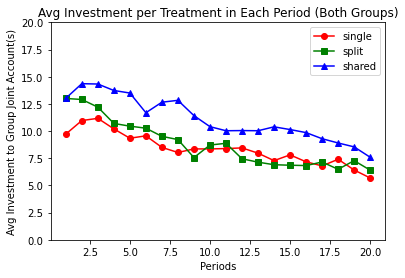

In [8]:
gen_avg_invest_plots(mgpggdf, singlePP, splitPP, sharedPP)

# Grouped Period Avgs

In [9]:
singleTrend = gen_invest_subsets(singlePP)
singleTrend

{'period_1': 9.71875,
 'period_2_to_10': 9.38888888888889,
 'period_11_to_20': 7.3390625}

In [10]:
splitTrend = gen_invest_subsets(splitPP)
splitTrend

{'period_1': 13.0, 'period_2_to_10': 10.171875, 'period_11_to_20': 7.1390625}

In [11]:
sharedTrend = gen_invest_subsets(sharedPP)
sharedTrend

{'period_1': 13.015625,
 'period_2_to_10': 12.769097222222221,
 'period_11_to_20': 9.484375}

# Avg Invest Per Participant

In [12]:
single_per_participant, split_per_participant, shared_per_participant = gen_avg_investment_per_participant_all_treatments(mgpggdf)

In [13]:
single_per_participant

participant.code
02yoiini     1.50
0j7kfhln    12.20
3glo2sut    14.35
3t1yd76e     4.80
3wsimfx1     4.55
            ...  
ybvwpn29     6.65
ydgp2bha     7.60
yk6lhwal     6.10
ztrzsad5     5.20
zu546g9a     7.90
Name: player.investment, Length: 64, dtype: float64

In [14]:
split_per_participant

participant.code
23a2mmhm    10.55
2pdifgop     1.40
3vg1nnb5    10.60
40c3ecb0     5.85
578shq6u     8.40
            ...  
y9eborjq     0.00
yx3p0b6v     7.35
zelu4yvk    12.20
znwkezuw    10.40
zx92uamy     7.70
Length: 64, dtype: float64

In [15]:
shared_per_participant

participant.code
14prhddm    19.95
1e0xptl3     8.45
1ef36mxh     6.05
29tlrw6l    15.40
2wa1hn3y     7.50
            ...  
zjk0f1ye    12.00
zkquw8f4    10.30
zl7cdh1u    10.40
znlu9jpg    12.40
zq928mn2    13.35
Length: 64, dtype: float64

## Statistical Test

### t-tests

In [16]:
singleSplitTTest = gen_t_stat(single_per_participant, split_per_participant)

t-statistic: -0.5925972053365383
p-value: 0.5545662550376598
Fail to reject the null hypothesis: No evidence that the means are different


In [17]:
splitSharedTTest = gen_t_stat(split_per_participant, shared_per_participant)

t-statistic: -3.042607758862884
p-value: 0.0029224035122727707
Reject the null hypothesis: The means are different


In [18]:
singleSharedTTest = gen_t_stat(single_per_participant, shared_per_participant)

t-statistic: -3.289028854114417
p-value: 0.0013098970466743176
Reject the null hypothesis: The means are different


### Tukey mult comparison

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
shared single  -2.7586 0.0013 -4.5833 -0.9339   True
shared  split  -2.3422 0.0078 -4.1668 -0.5175   True
single  split   0.4164 0.8521 -1.4083  2.2411  False
----------------------------------------------------


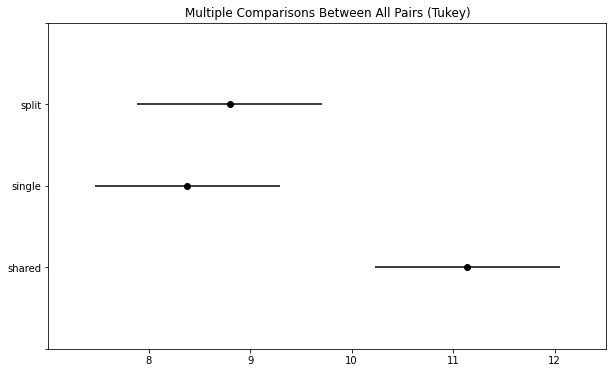

In [19]:
gen_tukey_test(single_per_participant, split_per_participant, shared_per_participant)

### Non-parametric multiple comparison

In [20]:
gen_kruskal_wallis_and_conover_iman(single_per_participant, split_per_participant, shared_per_participant)

Kruskal-Wallis H-test statistic: 14.648082470961315
P-value: 0.0006594916575929248
Conover-Iman posthoc test with Bonferroni adjustment:
          shared    single    split
shared  1.000000  0.000597  0.01314
single  0.000597  1.000000  1.00000
split   0.013140  1.000000  1.00000


### Gender Difference

In [21]:
femaleDf, maleDf = gen_gender_split(mgpggdf)

In [22]:
genderTStat, genderPValue = gen_t_stat(femaleDf, maleDf)

t-statistic: -0.6494430490358385
p-value: 0.5176909834387726
Fail to reject the null hypothesis: No evidence that the means are different


## Regressions

### panel ols

In [23]:
indices = ['participant.code', 'subsession.round_number']
depVarSingle = 'player.investment'
indepVar = ['RoumdIndep']

In [24]:
singleData = mgpggdf.loc[:, ['pgg_treatment_applied','participant.code', 'player.investment', 'subsession.round_number'] ]
singleData = singleData.loc[singleData['pgg_treatment_applied'] == 'single']
singleData['RoumdIndep'] = singleData['subsession.round_number']
singleData

,pgg_treatment_applied,participant.code,player.investment,subsession.round_number,RoumdIndep
0,single,byr62fae,12.0,1,1
1,single,byr62fae,16.0,2,2
2,single,byr62fae,20.0,3,3
3,single,byr62fae,20.0,4,4
4,single,byr62fae,20.0,5,5
...,...,...,...,...,...
1275,single,ztrzsad5,5.0,16,16
1276,single,ztrzsad5,2.0,17,17
1277,single,ztrzsad5,10.0,18,18
1278,single,ztrzsad5,3.0,19,19


In [25]:
singleRegression = gen_panel_ols(singleData,indices, depVarSingle, indepVar)

                          PanelOLS Estimation Summary                           
Dep. Variable:      player.investment   R-squared:                        0.0904
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                1280   R-squared (Within):               0.0904
Date:                Mon, Sep 25 2023   R-squared (Overall):              0.0452
Time:                        18:31:14   Log-likelihood                   -3642.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      120.77
Entities:                          64   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                  F(1,1215)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             120.77
                            

In [26]:
indices = ['participant.code', 'subsession.round_number']
depVarSingle = 'player.personal_account'
indepVar = ['RoumdIndep']

In [27]:
sharedData = mgpggdf.loc[:, ['pgg_treatment_applied','participant.code', 'player.personal_account', 'subsession.round_number'] ]
sharedData = sharedData.loc[sharedData['pgg_treatment_applied'] == 'shared']
sharedData['RoumdIndep'] = sharedData['subsession.round_number']
sharedData

,pgg_treatment_applied,participant.code,player.personal_account,subsession.round_number,RoumdIndep
2560,shared,znlu9jpg,6.0,1,1
2561,shared,znlu9jpg,2.0,2,2
2562,shared,znlu9jpg,5.0,3,3
2563,shared,znlu9jpg,8.0,4,4
2564,shared,znlu9jpg,12.0,5,5
...,...,...,...,...,...
3835,shared,7f6vtjiv,9.0,16,16
3836,shared,7f6vtjiv,14.0,17,17
3837,shared,7f6vtjiv,14.0,18,18
3838,shared,7f6vtjiv,18.0,19,19


In [28]:
sharedRegression = gen_panel_ols(sharedData,indices, depVarSingle, indepVar)

                             PanelOLS Estimation Summary                             
Dep. Variable:     player.personal_account   R-squared:                        0.1544
Estimator:                        PanelOLS   R-squared (Between):              0.0000
No. Observations:                     1280   R-squared (Within):               0.1544
Date:                     Mon, Sep 25 2023   R-squared (Overall):              0.0726
Time:                             18:31:14   Log-likelihood                   -3699.1
Cov. Estimator:                 Unadjusted                                           
                                             F-statistic:                      221.93
Entities:                               64   P-value                           0.0000
Avg Obs:                            20.000   Distribution:                  F(1,1215)
Min Obs:                            20.000                                           
Max Obs:                            20.000   F-statist

In [29]:
#panelData = gen_data_panel_ols(mgpggdf, indices, depVarSingle,indepVar)